1. Data collection and preprocessing.

In [1]:
import pandas as pd
df = pd.read_csv('hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [2]:
# Handling missing values
df.fillna(method='ffill', inplace=True)


df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
                                    .astype(str).agg('-'.join, axis=1))

print("Data preprocessing done!")


<ipython-input-2-1b2a510e34ff>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Data preprocessing done!


2. Analytics and Reporting.

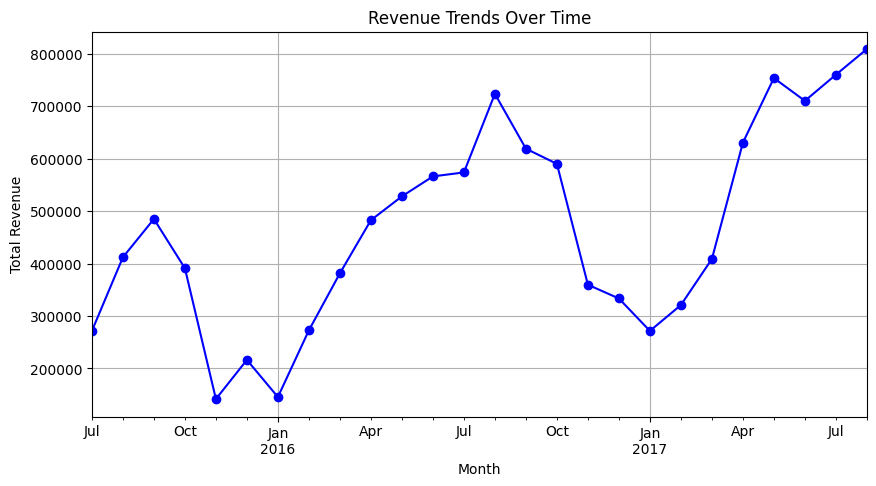

{Period('2015-07', 'M'): 271588.06,
 Period('2015-08', 'M'): 411934.11,
 Period('2015-09', 'M'): 484902.64,
 Period('2015-10', 'M'): 391084.63,
 Period('2015-11', 'M'): 141757.79,
 Period('2015-12', 'M'): 216311.38999999998,
 Period('2016-01', 'M'): 145597.69,
 Period('2016-02', 'M'): 272767.93,
 Period('2016-03', 'M'): 381430.43,
 Period('2016-04', 'M'): 482651.9,
 Period('2016-05', 'M'): 528075.29,
 Period('2016-06', 'M'): 566123.95,
 Period('2016-07', 'M'): 573715.3,
 Period('2016-08', 'M'): 723470.27,
 Period('2016-09', 'M'): 618959.16,
 Period('2016-10', 'M'): 589978.46,
 Period('2016-11', 'M'): 359605.18,
 Period('2016-12', 'M'): 333389.15,
 Period('2017-01', 'M'): 271574.11,
 Period('2017-02', 'M'): 320893.87,
 Period('2017-03', 'M'): 408746.02,
 Period('2017-04', 'M'): 630470.68,
 Period('2017-05', 'M'): 753553.54,
 Period('2017-06', 'M'): 710153.16,
 Period('2017-07', 'M'): 759959.67,
 Period('2017-08', 'M'): 808923.22}

In [3]:
#revenue trends over time:

import matplotlib.pyplot as plt
import seaborn as sns

def revenue_trends():
    # Group revenue by month
    monthly_revenue = df.groupby(df['arrival_date'].dt.to_period('M'))['adr'].sum()

    # Plot the revenue trend
    plt.figure(figsize=(10, 5))
    monthly_revenue.plot(kind='line', marker='o', color='b')
    plt.title('Revenue Trends Over Time')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.grid(True)
    plt.show()

    return monthly_revenue.to_dict()


revenue_trends()


In [4]:
#Cancellation rate as percentage of total bookings:

def cancellation_rate():
    cancel_rate = df['is_canceled'].mean() * 100
    print(f"Cancellation Rate: {cancel_rate:.2f}%")
    return {'Cancellation Rate (%)': cancel_rate}

cancellation_rate()


Cancellation Rate: 37.04%


{'Cancellation Rate (%)': np.float64(37.041628277075134)}

<ipython-input-5-c1c0b005bc90>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts[:10].index, y=country_counts[:10].values, palette='coolwarm')


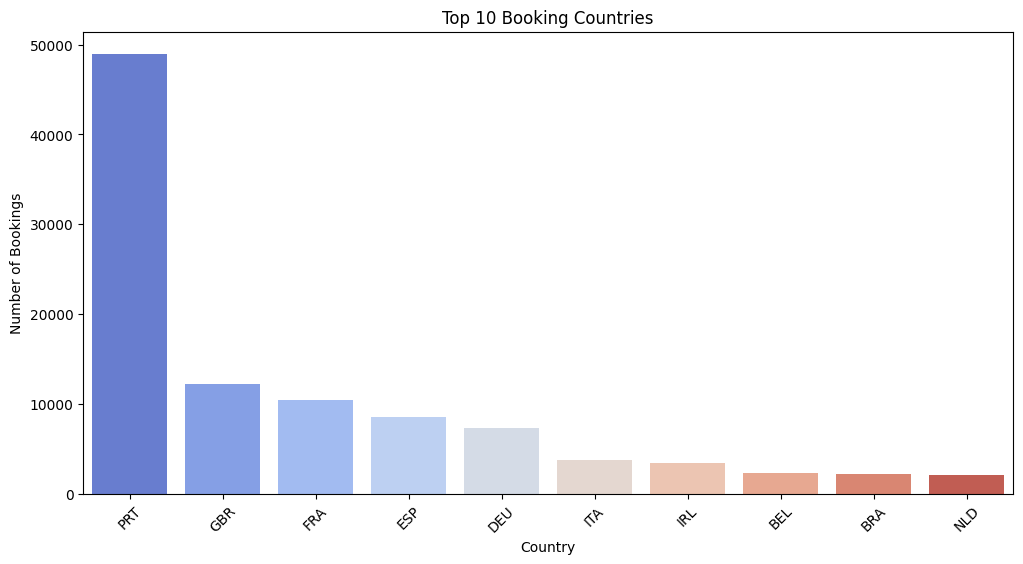

{'PRT': 48992,
 'GBR': 12158,
 'FRA': 10418,
 'ESP': 8574,
 'DEU': 7291,
 'ITA': 3772,
 'IRL': 3388,
 'BEL': 2347,
 'BRA': 2225,
 'NLD': 2104,
 'USA': 2097,
 'CHE': 1730,
 'CN': 1279,
 'AUT': 1263,
 'SWE': 1024,
 'CHN': 999,
 'POL': 920,
 'ISR': 669,
 'RUS': 632,
 'NOR': 607,
 'ROU': 500,
 'FIN': 462,
 'DNK': 435,
 'AUS': 426,
 'AGO': 364,
 'LUX': 287,
 'MAR': 259,
 'TUR': 248,
 'HUN': 231,
 'ARG': 214,
 'JPN': 197,
 'CZE': 171,
 'IND': 152,
 'KOR': 133,
 'GRC': 128,
 'DZA': 103,
 'SRB': 101,
 'HRV': 100,
 'MEX': 85,
 'IRN': 83,
 'EST': 83,
 'LTU': 81,
 'ZAF': 80,
 'BGR': 75,
 'NZL': 74,
 'COL': 71,
 'UKR': 68,
 'MOZ': 67,
 'CHL': 65,
 'SVK': 65,
 'THA': 59,
 'SVN': 57,
 'ISL': 57,
 'LVA': 55,
 'CYP': 51,
 'TWN': 51,
 'ARE': 51,
 'SAU': 48,
 'PHL': 40,
 'SGP': 39,
 'TUN': 39,
 'IDN': 35,
 'NGA': 34,
 'URY': 32,
 'EGY': 32,
 'LBN': 31,
 'HKG': 29,
 'PER': 29,
 'MYS': 28,
 'ECU': 27,
 'VEN': 26,
 'BLR': 26,
 'CPV': 24,
 'GEO': 22,
 'JOR': 21,
 'CRI': 19,
 'KAZ': 19,
 'MLT': 18,
 'OMN': 1

In [5]:
#Geographical distribution of users doing the bookings:

def geo_distribution():
    country_counts = df['country'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_counts[:10].index, y=country_counts[:10].values, palette='coolwarm')
    plt.title("Top 10 Booking Countries")
    plt.xlabel("Country")
    plt.ylabel("Number of Bookings")
    plt.xticks(rotation=45)
    plt.show()

    return country_counts.to_dict()

# Run the function
geo_distribution()


In [6]:
#Booking Lead time distribution:

def booking_lead_time():
    lead_time_stats = df['lead_time'].describe()
    print(lead_time_stats)
    return lead_time_stats.to_dict()

# Run the function
booking_lead_time()


count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


{'count': 119390.0,
 'mean': 104.01141636652986,
 'std': 106.86309704798579,
 'min': 0.0,
 '25%': 18.0,
 '50%': 69.0,
 '75%': 160.0,
 'max': 737.0}

<ipython-input-7-3796cd8c2f58>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_adr.index, y=avg_adr.values, palette="coolwarm")


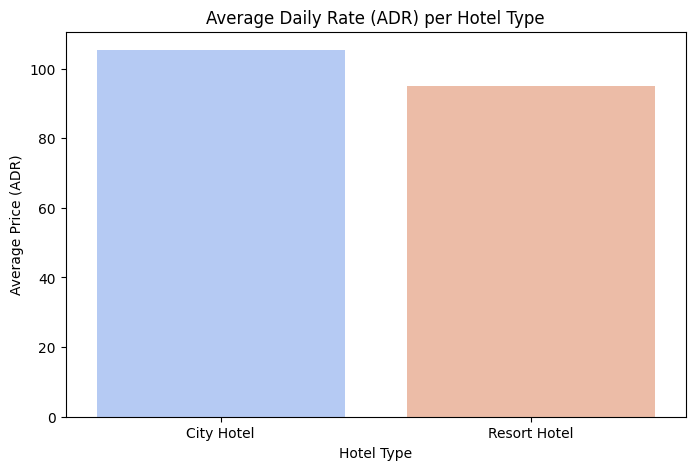

{'City Hotel': 105.30446539770578, 'Resort Hotel': 94.9529296055916}

In [7]:
#Additional Analytics:
def avg_price_per_hotel():
    avg_adr = df.groupby("hotel")["adr"].mean()


    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_adr.index, y=avg_adr.values, palette="coolwarm")
    plt.title("Average Daily Rate (ADR) per Hotel Type")
    plt.xlabel("Hotel Type")
    plt.ylabel("Average Price (ADR)")
    plt.show()

    return avg_adr.to_dict()

avg_price_per_hotel()

# This will show the average booking price for each hotel type City Hotel vs
# resort hotel


<ipython-input-8-ae0347c0a364>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="viridis")


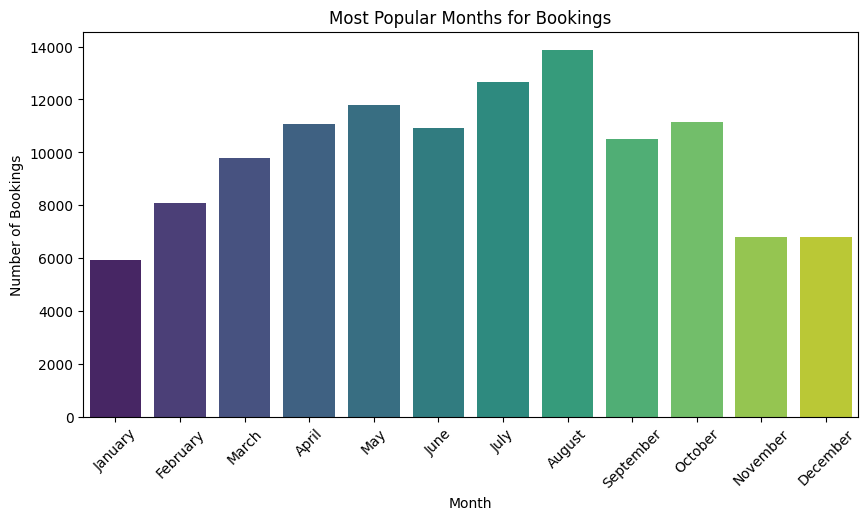

{'January': 5929,
 'February': 8068,
 'March': 9794,
 'April': 11089,
 'May': 11791,
 'June': 10939,
 'July': 12661,
 'August': 13877,
 'September': 10508,
 'October': 11160,
 'November': 6794,
 'December': 6780}

In [8]:
# mostpopular month:

def most_popular_months():
    month_order = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    df["arrival_date_month"] = pd.Categorical(df["arrival_date_month"], categories=month_order, ordered=True)
    monthly_counts = df["arrival_date_month"].value_counts().sort_index()


    plt.figure(figsize=(10, 5))
    sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="viridis")
    plt.title("Most Popular Months for Bookings")
    plt.xlabel("Month")
    plt.ylabel("Number of Bookings")
    plt.xticks(rotation=45)
    plt.show()

    return monthly_counts.to_dict()


most_popular_months()


<ipython-input-9-1083eecf7c2b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette="Set2")


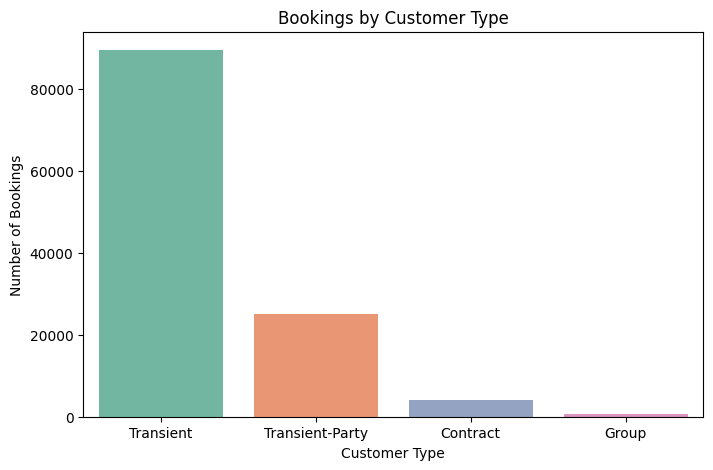

{'Transient': 89613, 'Transient-Party': 25124, 'Contract': 4076, 'Group': 577}

In [9]:
# booking trends by customer:
def booking_by_customer_type():
    customer_counts = df["customer_type"].value_counts()


    plt.figure(figsize=(8, 5))
    sns.barplot(x=customer_counts.index, y=customer_counts.values, palette="Set2")
    plt.title("Bookings by Customer Type")
    plt.xlabel("Customer Type")
    plt.ylabel("Number of Bookings")
    plt.show()

    return customer_counts.to_dict()


booking_by_customer_type()


3.Retrieval-Augmented Question Answering (RAG):


In [10]:
!pip install faiss-cpu sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [11]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('all-MiniLM-L6-v2')

texts = df['hotel'].astype(str).tolist()
embeddings = model.encode(texts)


index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(np.array(embeddings, dtype=np.float32))

print("FAISS Indexing Completed!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

FAISS Indexing Completed!


In [12]:
def search_query(query):
    query_vec = model.encode([query])
    D, I = index.search(np.array(query_vec, dtype=np.float32), k=5)
    results = df.iloc[I[0]][['hotel', 'adr', 'is_canceled', 'lead_time']].to_dict(orient='records')
    return results

search_query("Find expensive hotels")


[{'hotel': 'Resort Hotel', 'adr': 0.0, 'is_canceled': 0, 'lead_time': 342},
 {'hotel': 'Resort Hotel', 'adr': 0.0, 'is_canceled': 0, 'lead_time': 737},
 {'hotel': 'Resort Hotel', 'adr': 75.0, 'is_canceled': 0, 'lead_time': 7},
 {'hotel': 'Resort Hotel', 'adr': 75.0, 'is_canceled': 0, 'lead_time': 13},
 {'hotel': 'Resort Hotel', 'adr': 98.0, 'is_canceled': 0, 'lead_time': 14}]

4. API Development:

In [13]:
!pip install flask flask-cors


In [14]:
!pip install flask-ngrok


In [23]:
!pip install flask flask-ngrok pyngrok


In [ ]:
!ngrok authtoken 2uaGfaWgP6nFbcXC8JXruCg0iLr_2fWpG7tSsVhBHyXzYoKi3


In [ ]:
from flask import Flask
from pyngrok import ngrok

app = Flask(__name__)

@app.route("/")
def home():
    return "Hello, Flask is running on ngrok!"


public_url = ngrok.connect(5000)
print("Public URL:", public_url)


app.run(port=5000)


import requests

NGROK_URL = "https://838b-34-169-127-58.ngrok-free.app"

# Test Analytics API
response = requests.post(f"{NGROK_URL}/analytics")
print(response.json())


In [ ]:
!pip install flask-cors

In [16]:
pip install flask pandas faiss-cpu transformers torch sentence-transformers


In [19]:
import time

start_time = time.time()
search_query("Which locations had the highest booking cancellations?")
print("Time taken:", time.time() - start_time)


Time taken: 0.15879034996032715


In [21]:
from flask import Flask, request, jsonify
from flask_cors import CORS

# Define the Flask app instance
app = Flask(__name__)
CORS(app)  # Enables CORS for API requests

@app.route("/analytics", methods=["POST"])
def get_analytics():
    return jsonify({"cancellation_rate": cancellation_rate()})


# Other routes and functions remain the same

if __name__ == '__main__':
    app.run(host="0.0.0.0", port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [25]:
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
                                    .astype(str).agg('-'.join, axis=1))

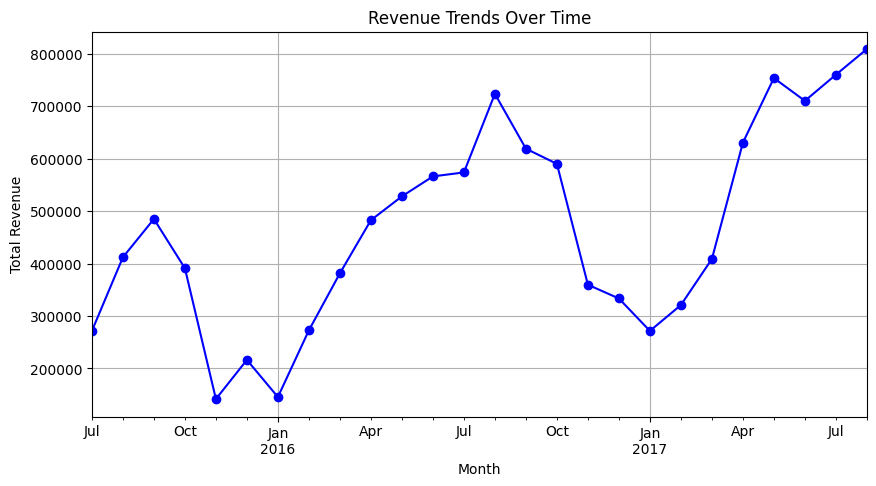

Revenue Trends: {Period('2015-07', 'M'): 271588.06, Period('2015-08', 'M'): 411934.11, Period('2015-09', 'M'): 484902.64, Period('2015-10', 'M'): 391084.63, Period('2015-11', 'M'): 141757.79, Period('2015-12', 'M'): 216311.38999999998, Period('2016-01', 'M'): 145597.69, Period('2016-02', 'M'): 272767.93, Period('2016-03', 'M'): 381430.43, Period('2016-04', 'M'): 482651.9, Period('2016-05', 'M'): 528075.29, Period('2016-06', 'M'): 566123.95, Period('2016-07', 'M'): 573715.3, Period('2016-08', 'M'): 723470.27, Period('2016-09', 'M'): 618959.16, Period('2016-10', 'M'): 589978.46, Period('2016-11', 'M'): 359605.18, Period('2016-12', 'M'): 333389.15, Period('2017-01', 'M'): 271574.11, Period('2017-02', 'M'): 320893.87, Period('2017-03', 'M'): 408746.02, Period('2017-04', 'M'): 630470.68, Period('2017-05', 'M'): 753553.54, Period('2017-06', 'M'): 710153.16, Period('2017-07', 'M'): 759959.67, Period('2017-08', 'M'): 808923.22}
Cancellation Rate: 37.04%
Cancellation Rate: {'Cancellation Rate (

<ipython-input-5-c1c0b005bc90>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts[:10].index, y=country_counts[:10].values, palette='coolwarm')


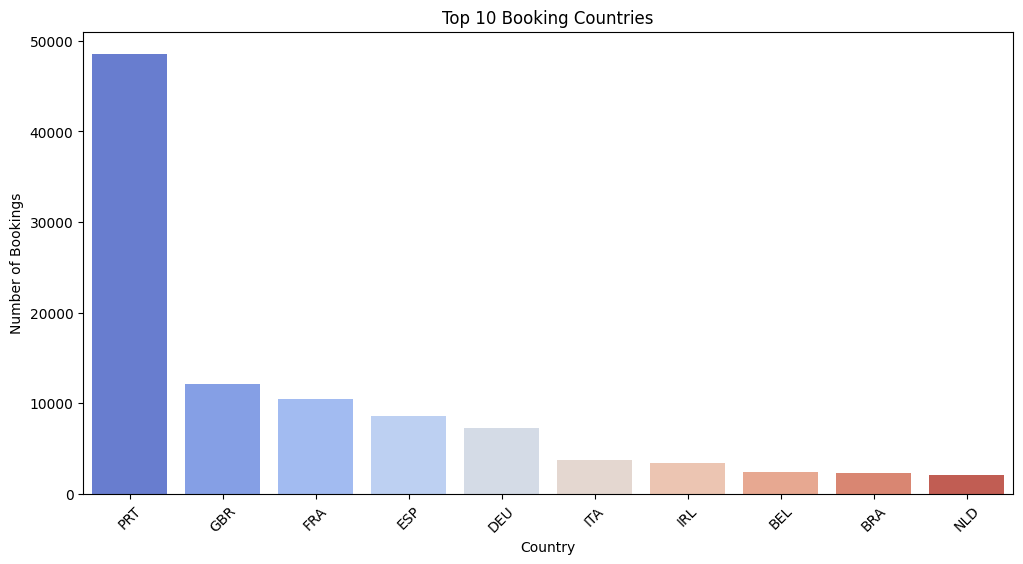

Geographical Distribution: {'PRT': 48590, 'GBR': 12129, 'FRA': 10415, 'ESP': 8568, 'DEU': 7287, 'ITA': 3766, 'IRL': 3375, 'BEL': 2342, 'BRA': 2224, 'NLD': 2104, 'USA': 2097, 'CHE': 1730, 'CN': 1279, 'AUT': 1263, 'SWE': 1024, 'CHN': 999, 'POL': 919, 'ISR': 669, 'RUS': 632, 'NOR': 607, 'ROU': 500, '': 488, 'FIN': 447, 'DNK': 435, 'AUS': 426, 'AGO': 362, 'LUX': 287, 'MAR': 259, 'TUR': 248, 'HUN': 230, 'ARG': 214, 'JPN': 197, 'CZE': 171, 'IND': 152, 'KOR': 133, 'GRC': 128, 'DZA': 103, 'SRB': 101, 'HRV': 100, 'MEX': 85, 'IRN': 83, 'EST': 83, 'LTU': 81, 'ZAF': 80, 'BGR': 75, 'NZL': 74, 'COL': 71, 'UKR': 68, 'MOZ': 67, 'CHL': 65, 'SVK': 65, 'THA': 59, 'SVN': 57, 'ISL': 57, 'LVA': 55, 'CYP': 51, 'TWN': 51, 'ARE': 51, 'SAU': 48, 'PHL': 40, 'SGP': 39, 'TUN': 39, 'IDN': 35, 'NGA': 34, 'URY': 32, 'EGY': 32, 'LBN': 31, 'HKG': 29, 'PER': 29, 'MYS': 28, 'ECU': 27, 'VEN': 26, 'BLR': 26, 'CPV': 24, 'GEO': 22, 'JOR': 21, 'CRI': 19, 'KAZ': 19, 'MLT': 18, 'OMN': 18, 'GIB': 18, 'AZE': 17, 'MAC': 16, 'KWT':

In [26]:
print("Revenue Trends:", revenue_trends())
print("Cancellation Rate:", cancellation_rate())
print("Geographical Distribution:", geo_distribution())
print("Booking Lead Time:", booking_lead_time())


In [27]:
search_query("Which locations had the highest booking cancellations?")


[{'hotel': 'City Hotel', 'adr': 0.0, 'is_canceled': 0, 'lead_time': 6},
 {'hotel': 'City Hotel', 'adr': 76.5, 'is_canceled': 1, 'lead_time': 88},
 {'hotel': 'City Hotel', 'adr': 68.0, 'is_canceled': 1, 'lead_time': 65},
 {'hotel': 'City Hotel', 'adr': 76.5, 'is_canceled': 1, 'lead_time': 92},
 {'hotel': 'City Hotel', 'adr': 76.5, 'is_canceled': 1, 'lead_time': 100}]

In [28]:
pip install flask flask-cors pandas numpy matplotlib seaborn faiss-cpu sentence-transformers


In [29]:
from google.colab.output import eval_js

# Start Flask inside Colab and get a working URL
print("Click the link below to access your API:")
print(eval_js("google.colab.kernel.proxyPort(5000)"))


Click the link below to access your API:
https://by3wljv7pg6-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [ ]:
!pip install flask-ngrok

from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

In [ ]:
!pip install flask-ngrok
!ngrok authtoken 2uiiHpHiw1nfX8IwgFKeOT7saIf_2LMbvmHyCzQsQuA1nk3UU